In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [31]:
s =pd.read_csv("sample_submission.csv")

In [32]:
s

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [2]:
dtype = {
    'store_nbr' : 'category',
    'family' : 'category',
    'sales' : 'float32',
    'onpromotion' : 'uint64',
}

store_sales = pd.read_csv( 'train.csv',
                          dtype = dtype,
                          parse_dates = ['date'],
                          infer_datetime_format = True,
                         )

store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']


In [24]:
store_sales

id        sales  \
date       store_nbr family                                             
2013-01-01 1         AUTOMOTIVE                        0     0.000000   
                     BABY CARE                         1     0.000000   
                     BEAUTY                            2     0.000000   
                     BEVERAGES                         3     0.000000   
                     BOOKS                             4     0.000000   
...                                                  ...          ...   
2017-08-15 9         POULTRY                     3000883   438.132996   
                     PREPARED FOODS              3000884   154.552994   
                     PRODUCE                     3000885  2419.729004   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000000   
                     SEAFOOD                     3000887    16.000000   

                                                 onpromotion  
date       store_nbr family                                   
2013-01-01 1         AUTOMOTIVE                            0  
                     BABY CARE                             0  
                     BEAUTY                                0  
                     BEVERAGES                             0  
                     BOOKS                                 0  
...                                                      ...  
2017-08-15 9         POULTRY                               0  
                     PREPARED FOODS                        1  
                     PRODUCE                             148  
                     SCHOOL AND OFFICE SUPPLIES            8  
                     SEAFOOD                               0  

[3000888 rows x 3 columns]

In [25]:
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
                 ...    
2017-08-11    463.733856
2017-08-12    444.798309
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Freq: D, Name: sales, Length: 1684, dtype: float32

In [3]:
df = average_sales.to_frame()

In [18]:
print(df)

                 sales  time       lag_1
date                                    
2013-01-01    1.409438     0         NaN
2013-01-02  278.390808     1    1.409438
2013-01-03  202.840195     2  278.390808
2013-01-04  198.911163     3  202.840195
2013-01-05  267.873260     4  198.911163
...                ...   ...         ...
2017-08-11  463.733856  1679  365.536987
2017-08-12  444.798309  1680  463.733856
2017-08-13  485.768616  1681  444.798309
2017-08-14  427.004730  1682  485.768616
2017-08-15  427.980896  1683  427.004730

[1684 rows x 3 columns]


In [4]:
# Create a time dummy
time = np.arange(len(df.index))
df['time'] = time

In [5]:
# Create Training data
X = df.loc[:, ['time']]  #feature
y = df.loc[:, 'sales']  #target

In [28]:
X

,lag_1
date,
2013-01-02,1.409438
2013-01-03,278.390808
2013-01-04,202.840195
2013-01-05,198.911163
2013-01-06,267.873260
...,...
2017-08-11,365.536987
2017-08-12,463.733856
2017-08-13,444.798309


In [27]:
y

date
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
2013-01-06    291.636017
                 ...    
2017-08-11    463.733856
2017-08-12    444.798309
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Freq: D, Name: sales, Length: 1683, dtype: float32

In [ ]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [6]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [8]:
y_pred

date
2013-01-01    194.232790
2013-01-02    194.427137
2013-01-03    194.621484
2013-01-04    194.815831
2013-01-05    195.010178
                 ...    
2017-08-11    520.541320
2017-08-12    520.735667
2017-08-13    520.930014
2017-08-14    521.124361
2017-08-15    521.318708
Freq: D, Length: 1684, dtype: float64

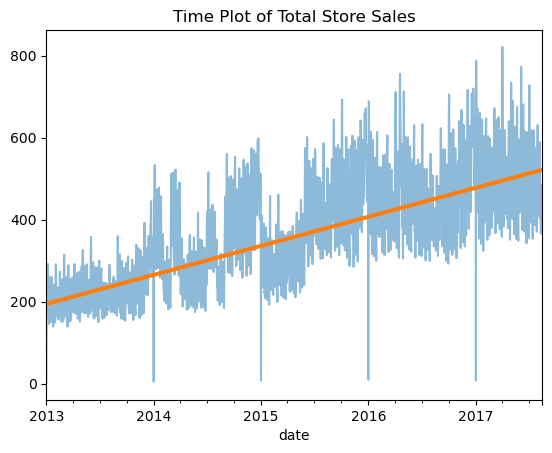

In [9]:
ax = y.plot( alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

In [10]:
# Create a lag feature from the target sales
lag_1 = df['sales'].shift(1)
df['lag_1'] = lag_1

In [11]:
X = df.loc[:, ['lag_1']].dropna() # features
y= df.loc[:, 'sales'] # target

y, X = y.align(X, join='inner' ) # drop corresponding values in target


In [12]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [13]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [14]:
y_pred

date
2013-01-02     85.301689
2013-01-03    297.268250
2013-01-04    239.451340
2013-01-05    236.444550
2013-01-06    289.219421
                 ...    
2017-08-11    363.958893
2017-08-12    439.106384
2017-08-13    424.615509
2017-08-14    455.968994
2017-08-15    410.998535
Freq: D, Length: 1683, dtype: float32

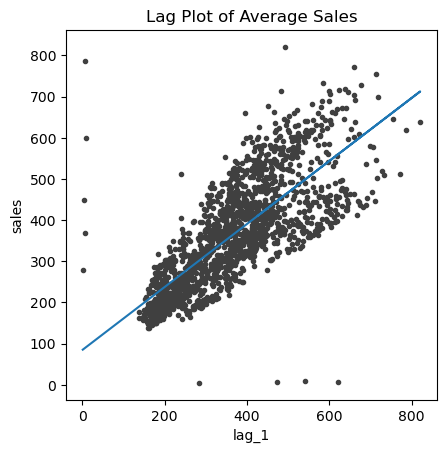

In [15]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

The trend component of a time series represents a persistent, long-term change in the mean of the series. The trend is the slowest-moving part of a series

To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. Each point on the graph represents the average of all the values in the series that fall within the window on either side. 

Now make a moving average plot to estimate the trend for this series. Since this series has daily observations, let's choose a window of 365 days to smooth over any short-term changes within the year.

In [16]:
trend = average_sales.rolling(
    window=365,
    center=True,       # puts the average at the center of the window
    min_periods=183,   # choose about half the window size
).mean()   # compute the mean (could also do median, std, min, max)

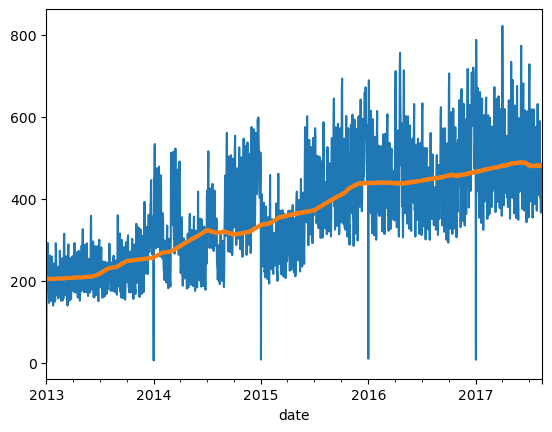

In [17]:
ax = average_sales.plot()
ax = trend.plot(ax=ax, linewidth=3)